In [1]:
#  1. ბიბლიოთეკების იმპორტი
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# 2. ბაზასთან დაკავშირება
conn = sqlite3.connect('fictional_characters.sqlite')
cur = conn.cursor()

In [3]:
#  3. ცხრილების ჩამონათვალი
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("ცხრილები:", cur.fetchall())

ცხრილები: [('characters',)]


In [4]:
#  4. SELECT მაგალითი: Antagonists from Mystery Movies
query = """
SELECT [Character Name]
FROM characters
WHERE [Media Type] = 'Movie'
  AND Genre = 'Mystery'
  AND Role = 'Antagonist';
"""

# ერთი შედეგი
cur.execute(query)
print(" fetchone:", cur.fetchone())

# ხუთი შედეგი
cur.execute(query)
for row in cur.fetchmany(5):
    print("", row)

# ყველა შედეგი
cur.execute(query)
all_chars = cur.fetchall()
print(" Total:", len(all_chars))

 fetchone: ('Mr. Richard Garcia DVM',)
 ('Mr. Richard Garcia DVM',)
 ('Sydney Aguilar',)
 ('Jenny Moore',)
 ('Melissa Mitchell',)
 ('Michael Sanchez',)
 Total: 6


In [5]:
#  5. INSERT — ახალი პერსონაჟის დამატება
name = input("შეიყვანე სახელი: ")
media = input("შეიყვანე მედია ტიპი (მაგ: Movie): ")
genre = input("შეიყვანე ჟანრი: ")
role = input("შეიყვანე როლი: ")

cur.execute("INSERT INTO characters ([Character Name], [Media Type], Genre, Role) VALUES (?, ?, ?, ?)",
            (name, media, genre, role))
conn.commit()
print(" პერსონაჟი დამატებულია")

შეიყვანე სახელი:  
შეიყვანე მედია ტიპი (მაგ: Movie):  
შეიყვანე ჟანრი:  
შეიყვანე როლი:  


 პერსონაჟი დამატებულია


In [6]:
#  6. UPDATE — არსებული პერსონაჟის როლის განახლება
char_name = input("ვის როლი უნდა განვაახლოთ? (Character Name): ")
new_role = input("ახალი როლი: ")

cur.execute("UPDATE characters SET Role = ? WHERE [Character Name] = ?", (new_role, char_name))
conn.commit()
print(" განახლებულია.")

ვის როლი უნდა განვაახლოთ? (Character Name):  
ახალი როლი:  


 განახლებულია.


In [7]:
#  7. DELETE — პერსონაჟის წაშლა
del_name = input("რომელი პერსონაჟი წავშალო? (Character Name): ")

cur.execute("DELETE FROM characters WHERE [Character Name] = ?", (del_name,))
conn.commit()
print("❌ წაიშალა.")

რომელი პერსონაჟი წავშალო? (Character Name):  


❌ წაიშალა.


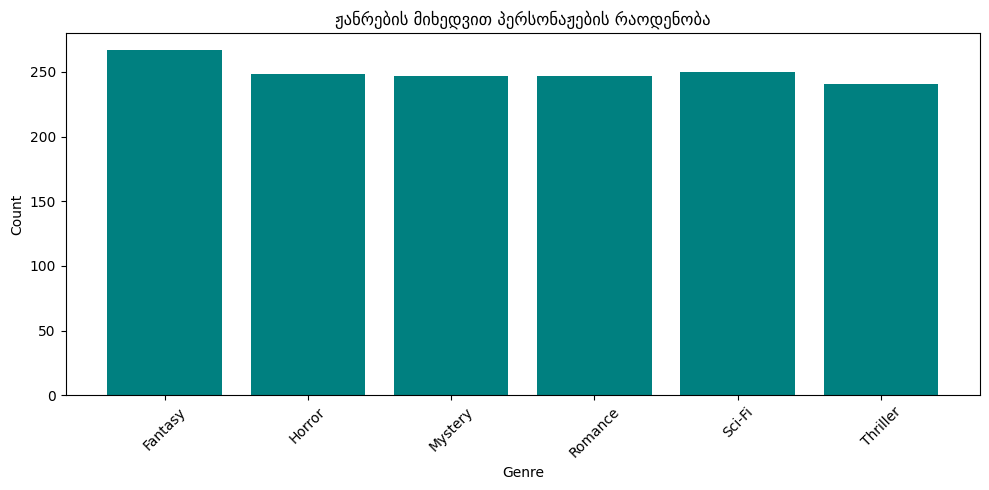

In [8]:
#  8.  დიაგრამა 1 — ჟანრების რაოდენობა
cur.execute("SELECT Genre, COUNT(*) FROM characters GROUP BY Genre;")
data = cur.fetchall()

genres = [d[0] for d in data]
counts = [d[1] for d in data]

plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='teal')
plt.title("ჟანრების მიხედვით პერსონაჟების რაოდენობა")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

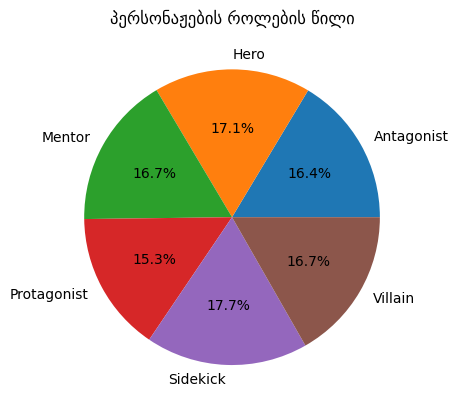

In [9]:
#  9.  დიაგრამა 2 — Role-ების განაწილება
cur.execute("SELECT Role, COUNT(*) FROM characters GROUP BY Role;")
role_data = cur.fetchall()

roles = [r[0] for r in role_data]
role_counts = [r[1] for r in role_data]

plt.pie(role_counts, labels=roles, autopct='%1.1f%%')
plt.title("პერსონაჟების როლების წილი")
plt.show()

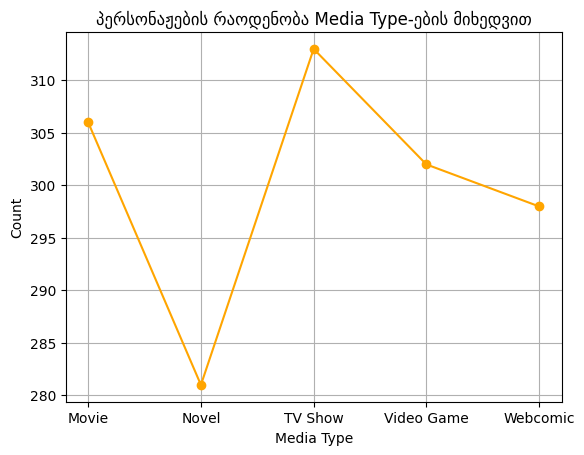

In [10]:
#  10.  დიაგრამა 3 — Media Type-ების ხაზოვანი დიაგრამა
cur.execute("SELECT [Media Type], COUNT(*) FROM characters GROUP BY [Media Type];")
media_data = cur.fetchall()

media_types = [m[0] for m in media_data]
media_counts = [m[1] for m in media_data]

plt.plot(media_types, media_counts, marker='o', color='orange')
plt.title("პერსონაჟების რაოდენობა Media Type-ების მიხედვით")
plt.xlabel("Media Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [11]:
#  11. ბაზის კავშირის დახურვა
conn.close()
print(" კავშირი დაიხურა.")

 კავშირი დაიხურა.
